In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
import os,sys,fnmatch,time
import numpy as np

from salishsea_tools.nc_tools import scDataset

%matplotlib inline

# Extract variables and plot

In [2]:
def get_daily_files(dirname, grid):
    '''from analysis-michael/raw/tip/notebooks/FraserFlow.ipynb
    '''
    files = []    
    for item in os.listdir(dirname):
        if fnmatch.fnmatchcase(item, "MCKNZ_1h_20170101_20170120_*"+grid+"*.nc"):
            files += [os.path.join(dirname,item)]
    return files

def get_variables(dep_ind, filesT, filesU):
    time_ind = 300

    with scDataset(filesT) as ds:
        temp_parent = ds.variables['votemper'][time_ind, dep_ind,:,:]
        nav_lat_parent = ds.variables['nav_lat'][:]
        nav_lon_parent = ds.variables['nav_lon'][:]

    with scDataset(filesU) as ds:
        u_parent = ds.variables['vozocrtx'][time_ind, dep_ind,:,:]

    with nc.Dataset(os.path.join(dirname, '1_MCKNZ_1h_20170101_20170120_grid_T.nc'), 'r') as nbl:
        temp_child = nbl.variables['votemper'][time_ind, dep_ind,:,:]
        nav_lat_child = nbl.variables['nav_lat'][:]
        nav_lon_child = nbl.variables['nav_lon'][:]

    with nc.Dataset(os.path.join(dirname, '1_MCKNZ_1h_20170101_20170120_grid_U.nc'), 'r') as nbl:
        u_child = nbl.variables['vozocrtx'][time_ind, dep_ind,:,:]
        
    with nc.Dataset(os.path.join(dirname, '1_mesh_mask.nc'), 'r') as nbl:
        tmask = nbl.variables['tmask'][0,dep_ind,:,:]
        umask = nbl.variables['umask'][0,dep_ind,:,:]

    temp_child = np.ma.array(temp_child, mask=1 - tmask)
    u_child = np.ma.array(u_child, mask=1 - umask)
    
    return temp_parent, temp_child, u_parent, u_child, nav_lon_parent, nav_lat_parent, nav_lon_child, nav_lat_child

In [3]:
def make_plot(var_parent, var_child, nav_lon_parent, nav_lat_parent, nav_lon_child, nav_lat_child, vmin, vmax, ttl):
    s = slice(1,-1,None)
    fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2,2,figsize=(20, 15))
    cmap = plt.get_cmap(cm.Paired_r)
    cmap.set_bad('wheat')

    plt.tight_layout(h_pad=8, w_pad=3)
    plt.suptitle(ttl, fontsize=30)
    plt.subplots_adjust(top=0.90)
    
    p1 = ax1.pcolormesh(var_parent, vmin=vmin, vmax=vmax, cmap=cmap)
    p2 = ax2.pcolormesh(var_child, vmin=vmin, vmax=vmax, cmap=cmap)
  
    p3 = ax3.pcolormesh(nav_lon_parent[s,s], nav_lat_parent[s,s], var_parent[s,s], vmin=vmin, vmax=vmax, cmap=cmap)
    ax3.scatter(nav_lon_child[::10, ::10], nav_lat_child[::10, ::10], alpha=0.2, c='k')
    
    p4 = ax4.pcolormesh(nav_lon_parent[s,s], nav_lat_parent[s,s], var_parent[s,s], vmin=vmin, vmax=vmax, cmap=cmap)
    ax4.pcolormesh(nav_lon_child[s,s], nav_lat_child[s,s], var_child[s,s], vmin=vmin, vmax=vmax, cmap=cmap)

    ax1.set_title('parent', fontsize=25)
    ax2.set_title('child', fontsize=25)
    ax3.set_title('parent with child coordinates', fontsize=25)
    ax4.set_title('parent AND child', fontsize=25)
    
    ax1.set_xlim([0,var_parent.shape[1]]); ax1.set_ylim([0,var_parent.shape[0]])
    ax2.set_xlim([0,var_child.shape[1]]); ax2.set_ylim([0,var_child.shape[0]])

    for p, ax in zip([p1, p2, p3, p4], [ax1, ax2, ax3, ax4]):
        cbar = fig.colorbar(p, ax=ax)
        if ax==ax3 or ax==ax4:
            ax.set_xlim([nav_lon_parent[s,s].min(), nav_lon_parent[s,s].max()])
            ax.set_ylim([nav_lat_parent[s,s].min(), nav_lat_parent[s,s].max()])
            ax.set_xlabel('longitude', fontsize=15); ax.set_ylabel('latitude', fontsize=15)
        if ax==ax1 or ax==ax2:
            ax.set_xlabel('x indices', fontsize=15); ax.set_ylabel('y indices', fontsize=15)
        #if ax==ax2 or ax==ax4:
        #    ax.set_axis_bgcolor('wheat')
    return fig

# 1. Ideal using dynspg_ts

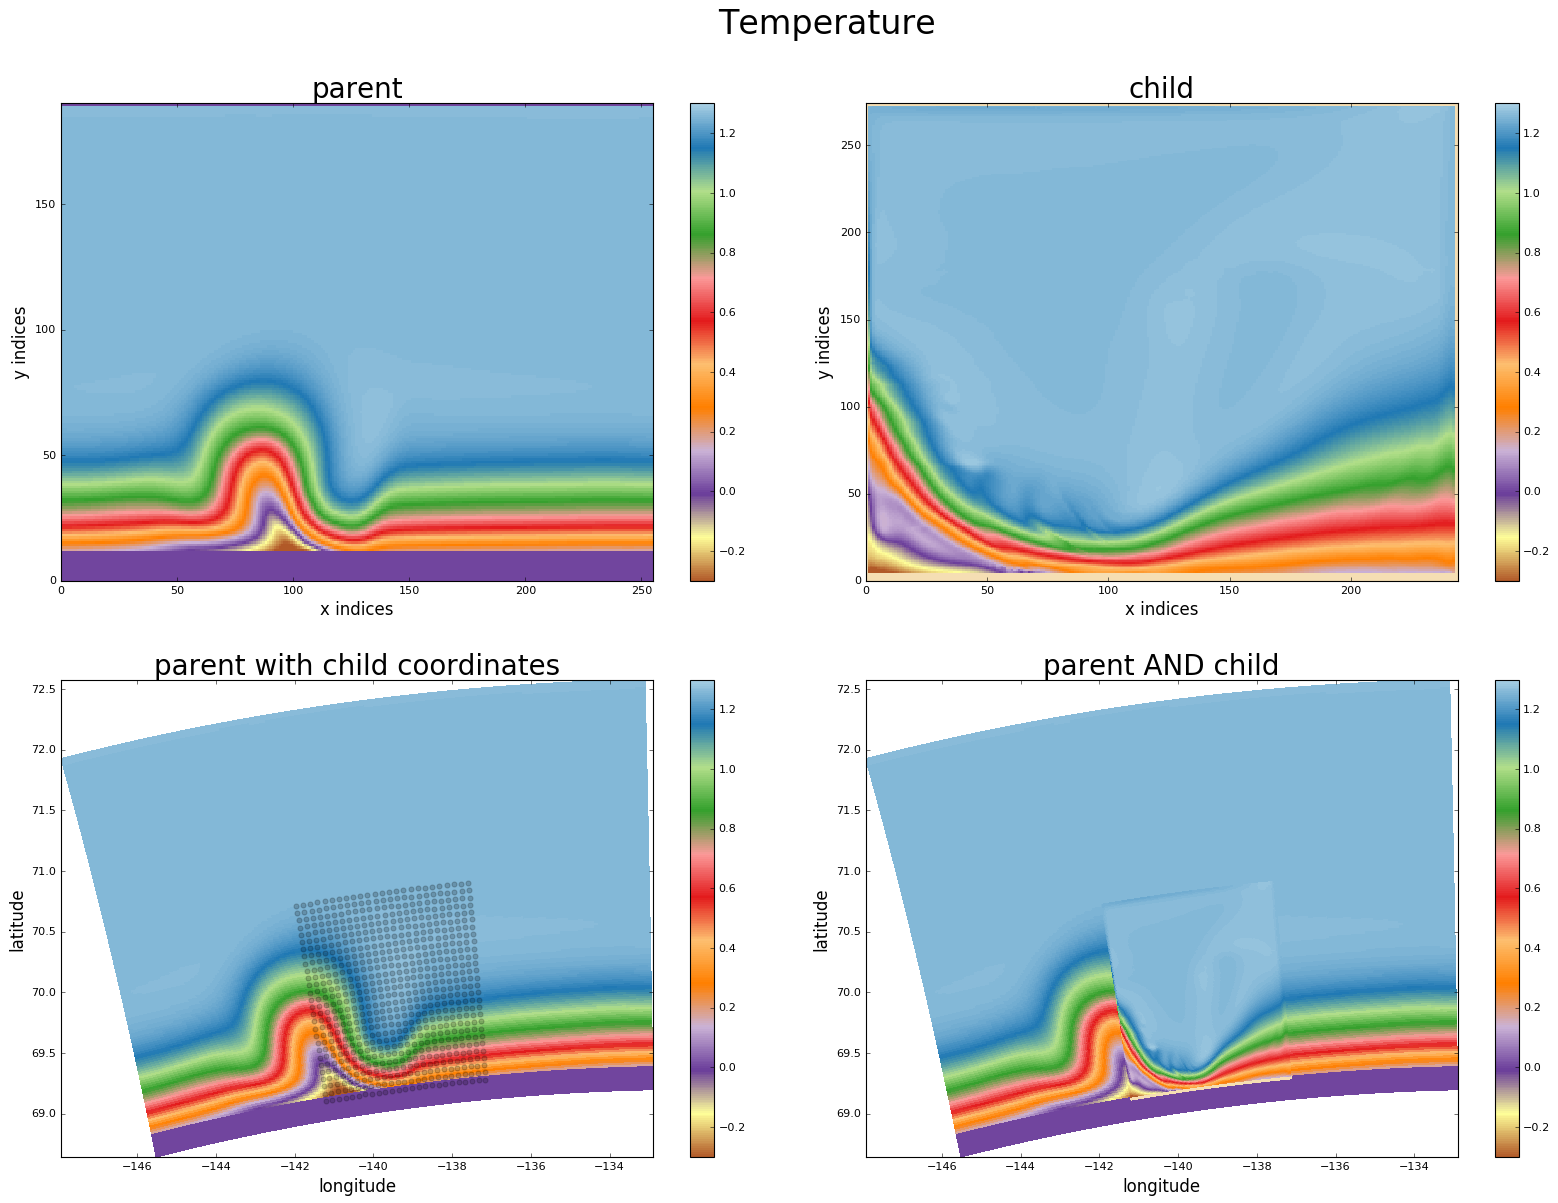

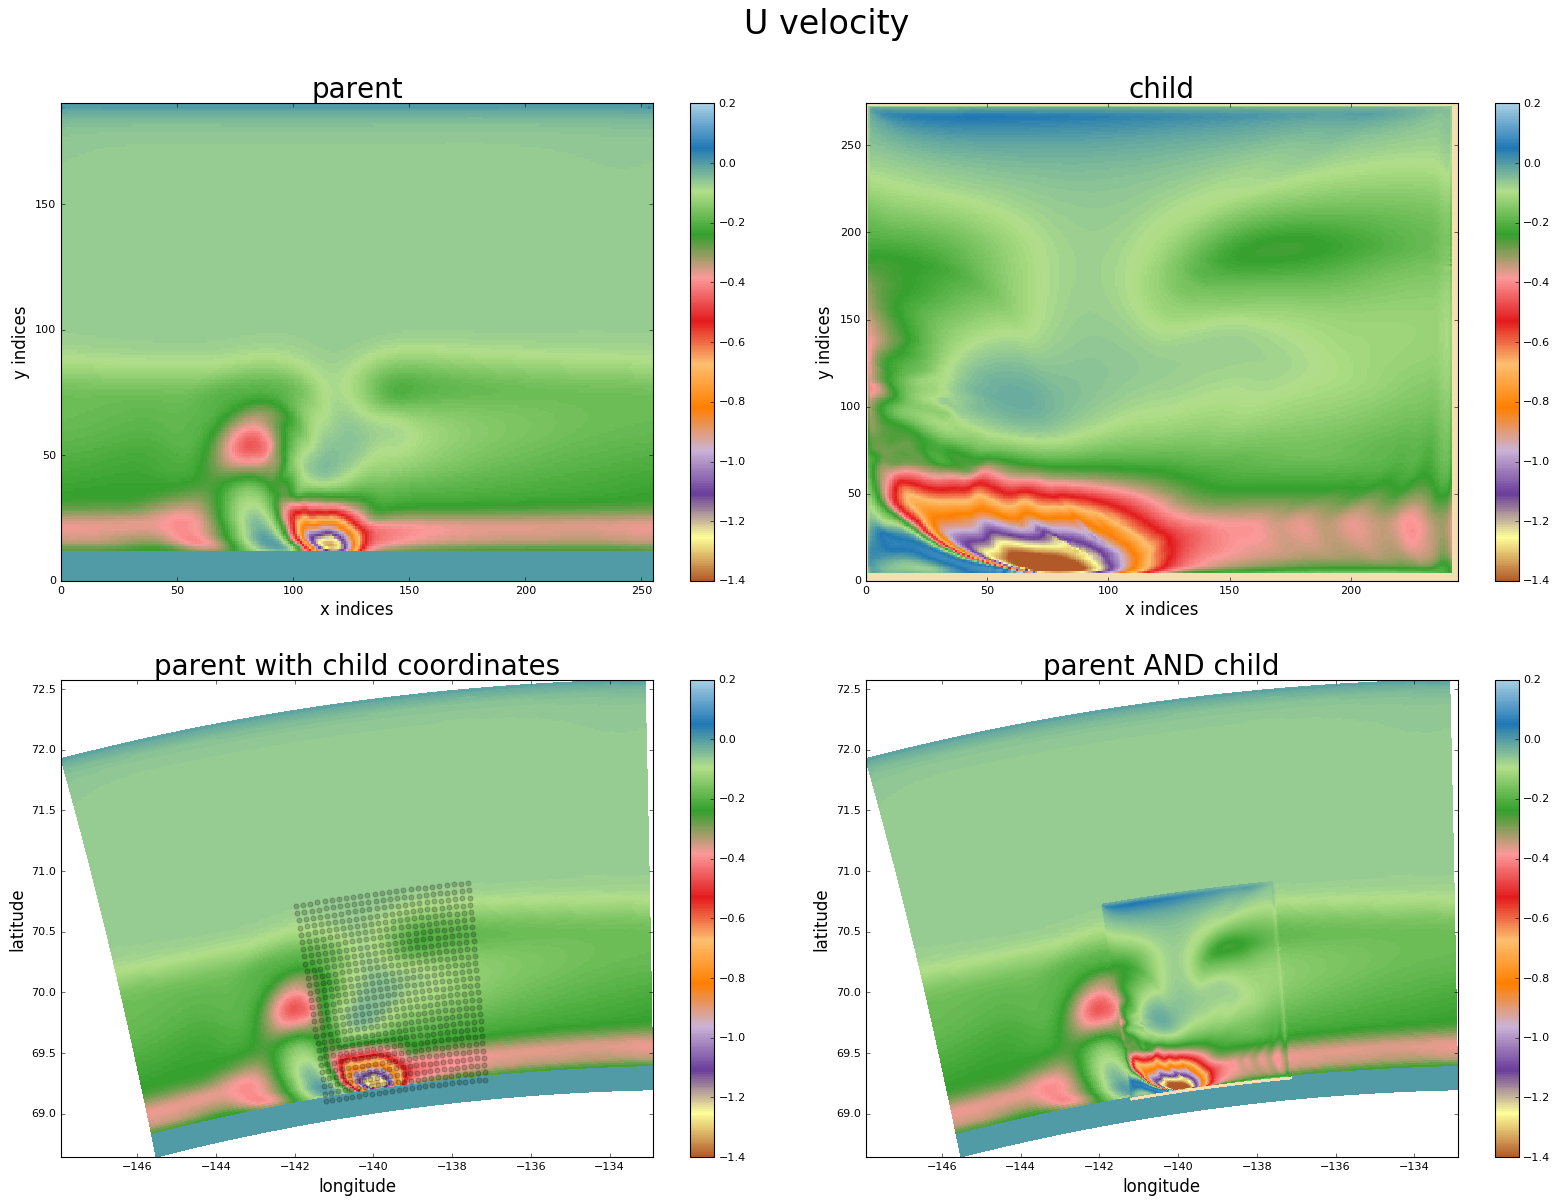

In [4]:
dirname='/home/mdunphy/Canyons/Results/Ideal4/'
filesT = get_daily_files(dirname, 'grid_T')
filesT.sort(key=os.path.basename)

filesU = get_daily_files(dirname, 'grid_U')
filesU.sort(key=os.path.basename)

dep_ind = 0
temp_parent, temp_child, u_parent, u_child, nav_lon_parent, nav_lat_parent, nav_lon_child, nav_lat_child = get_variables(dep_ind, filesT, filesU)

ttl = 'Temperature'
figT =  make_plot(temp_parent, temp_child, nav_lon_parent, nav_lat_parent, nav_lon_child, nav_lat_child, -0.3, 1.3, ttl)

ttl = 'U velocity'
figU =  make_plot(u_parent, u_child, nav_lon_parent, nav_lat_parent, nav_lon_child, nav_lat_child, -1.4, 0.2, ttl)

# Ideal using dynspg_flt

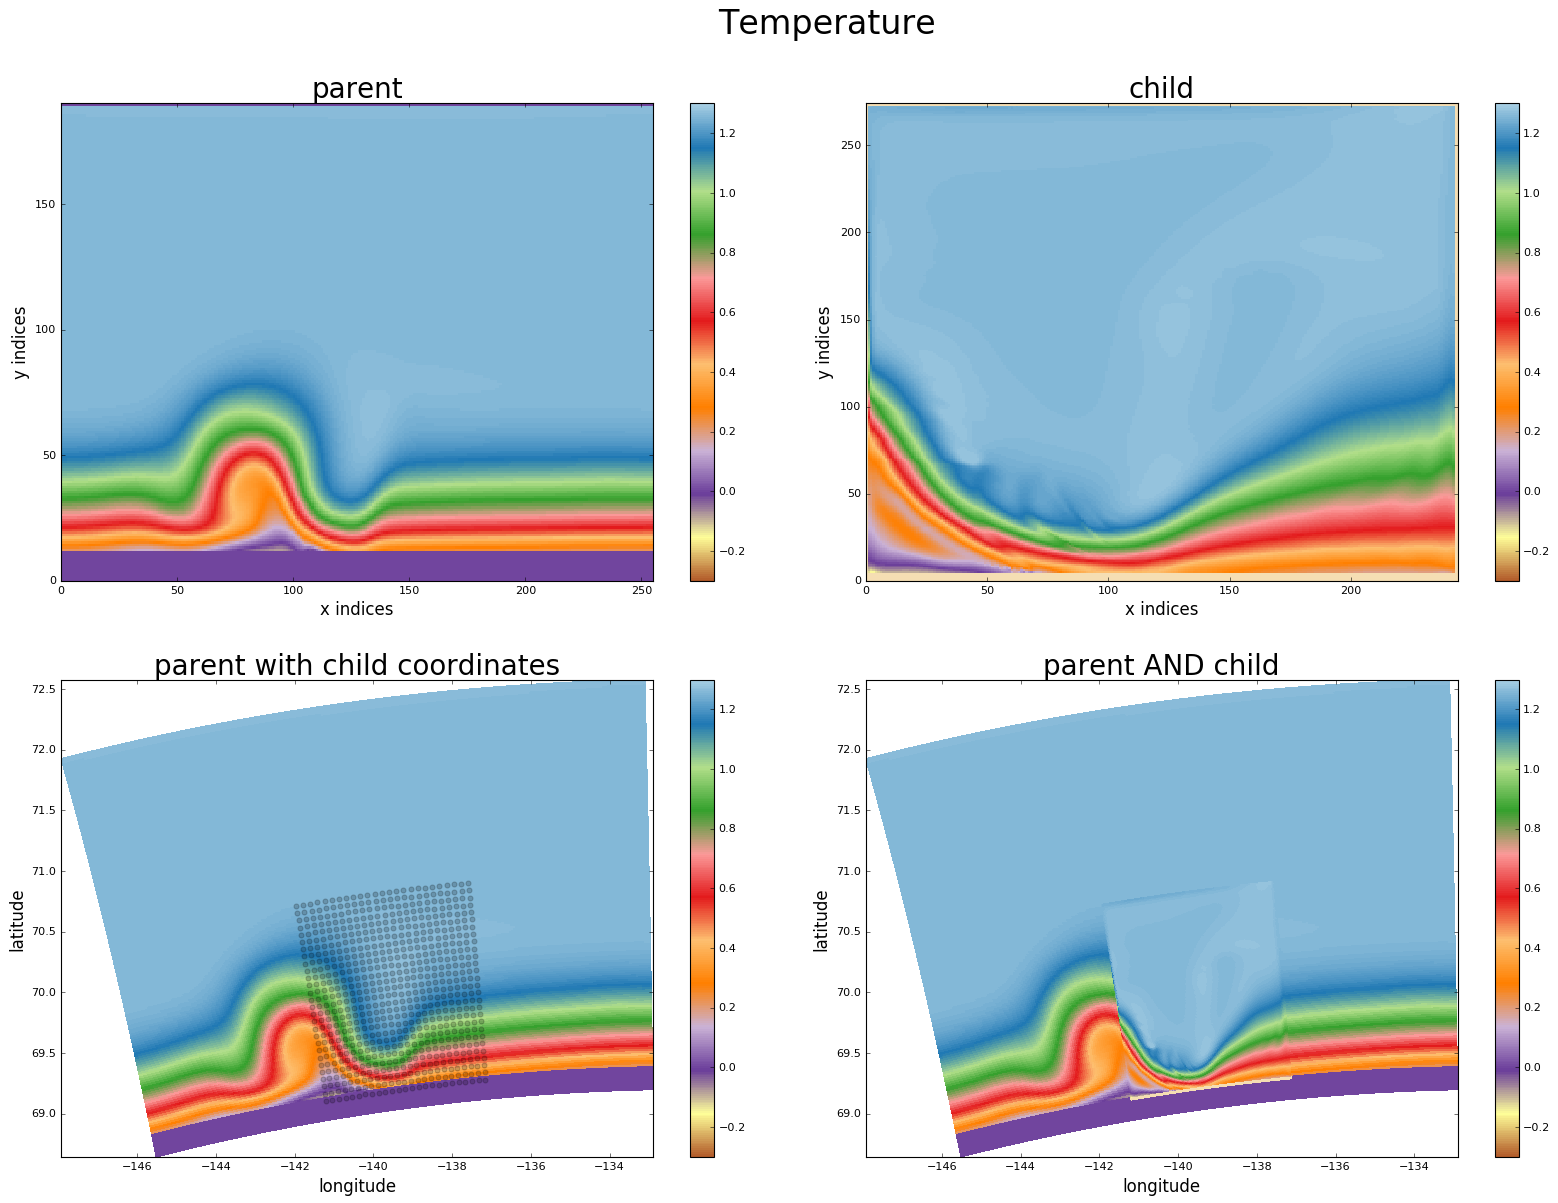

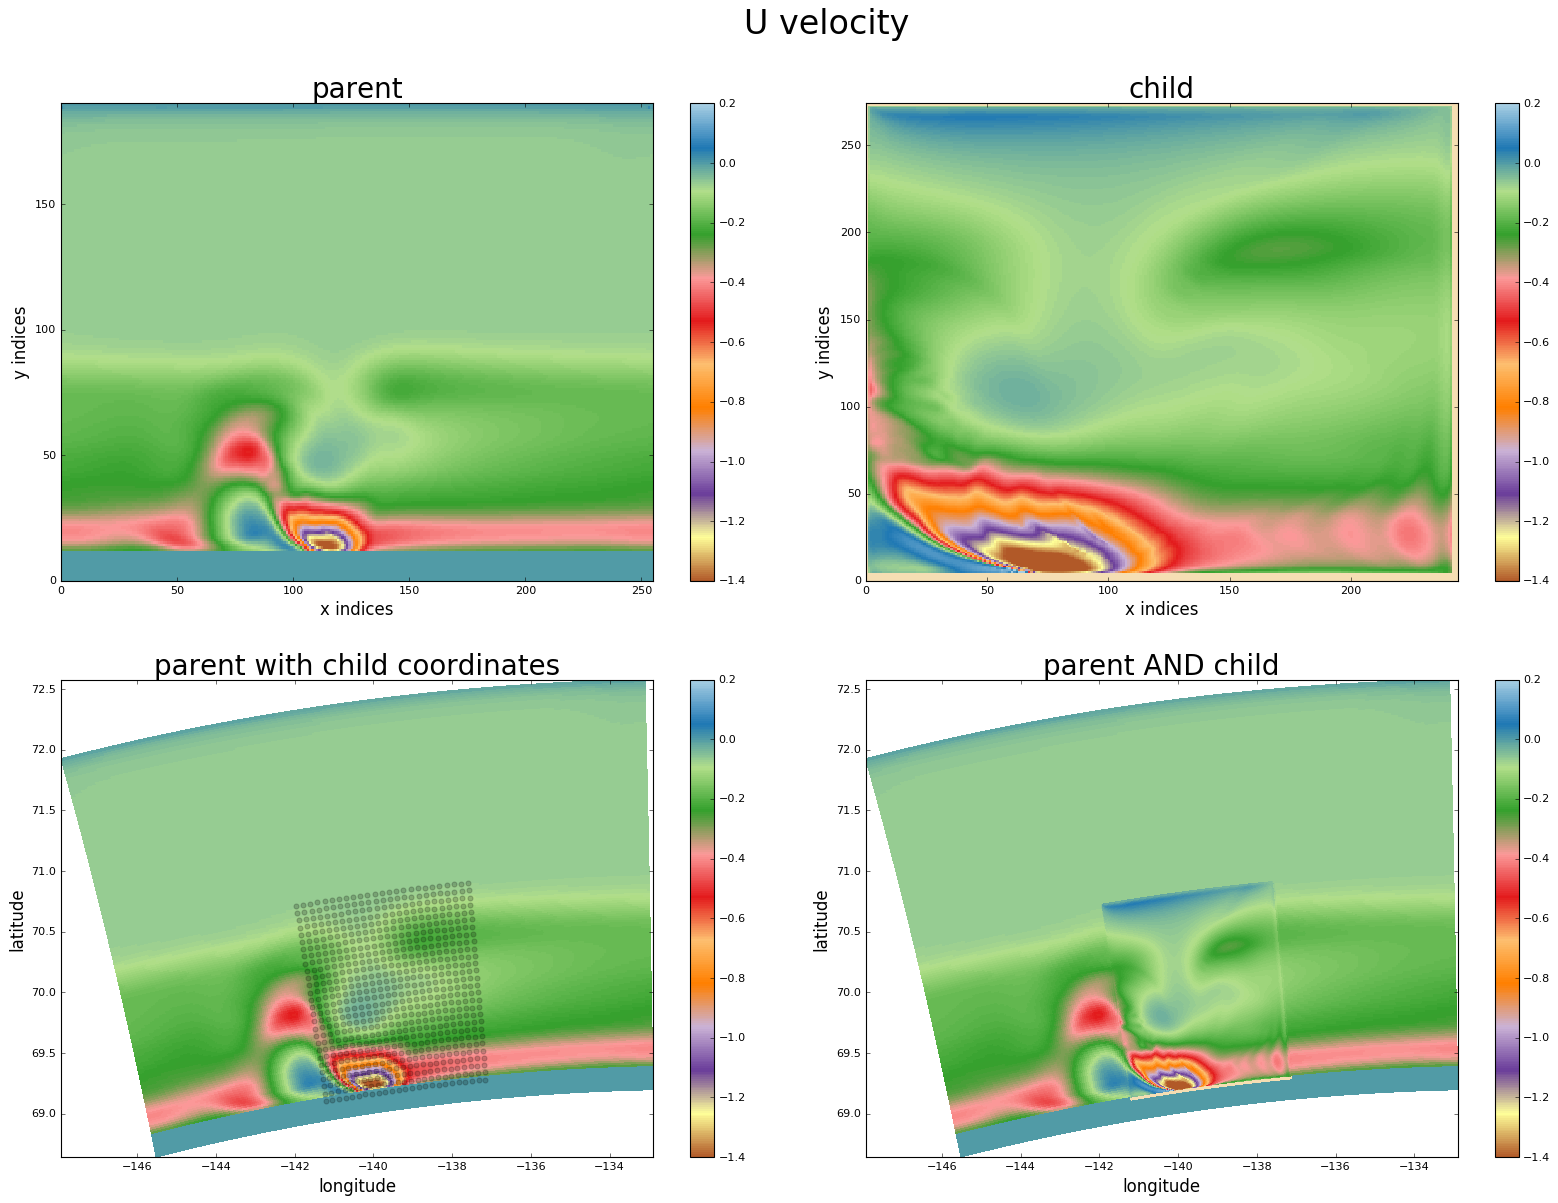

In [5]:
dirname='/home/mdunphy/Canyons/Results/Ideal4flt/'
filesT = get_daily_files(dirname, 'grid_T')
filesT.sort(key=os.path.basename)

filesU = get_daily_files(dirname, 'grid_U')
filesU.sort(key=os.path.basename)

dep_ind = 0
temp_parent, temp_child, u_parent, u_child, nav_lon_parent, nav_lat_parent, nav_lon_child, nav_lat_child = get_variables(dep_ind, filesT, filesU)

ttl = 'Temperature'
figT =  make_plot(temp_parent, temp_child, nav_lon_parent, nav_lat_parent, nav_lon_child, nav_lat_child, -0.3, 1.3, ttl)

ttl = 'U velocity'
figU =  make_plot(u_parent, u_child, nav_lon_parent, nav_lat_parent, nav_lon_child, nav_lat_child, -1.4, 0.2, ttl)

# Real using dynspg_ts

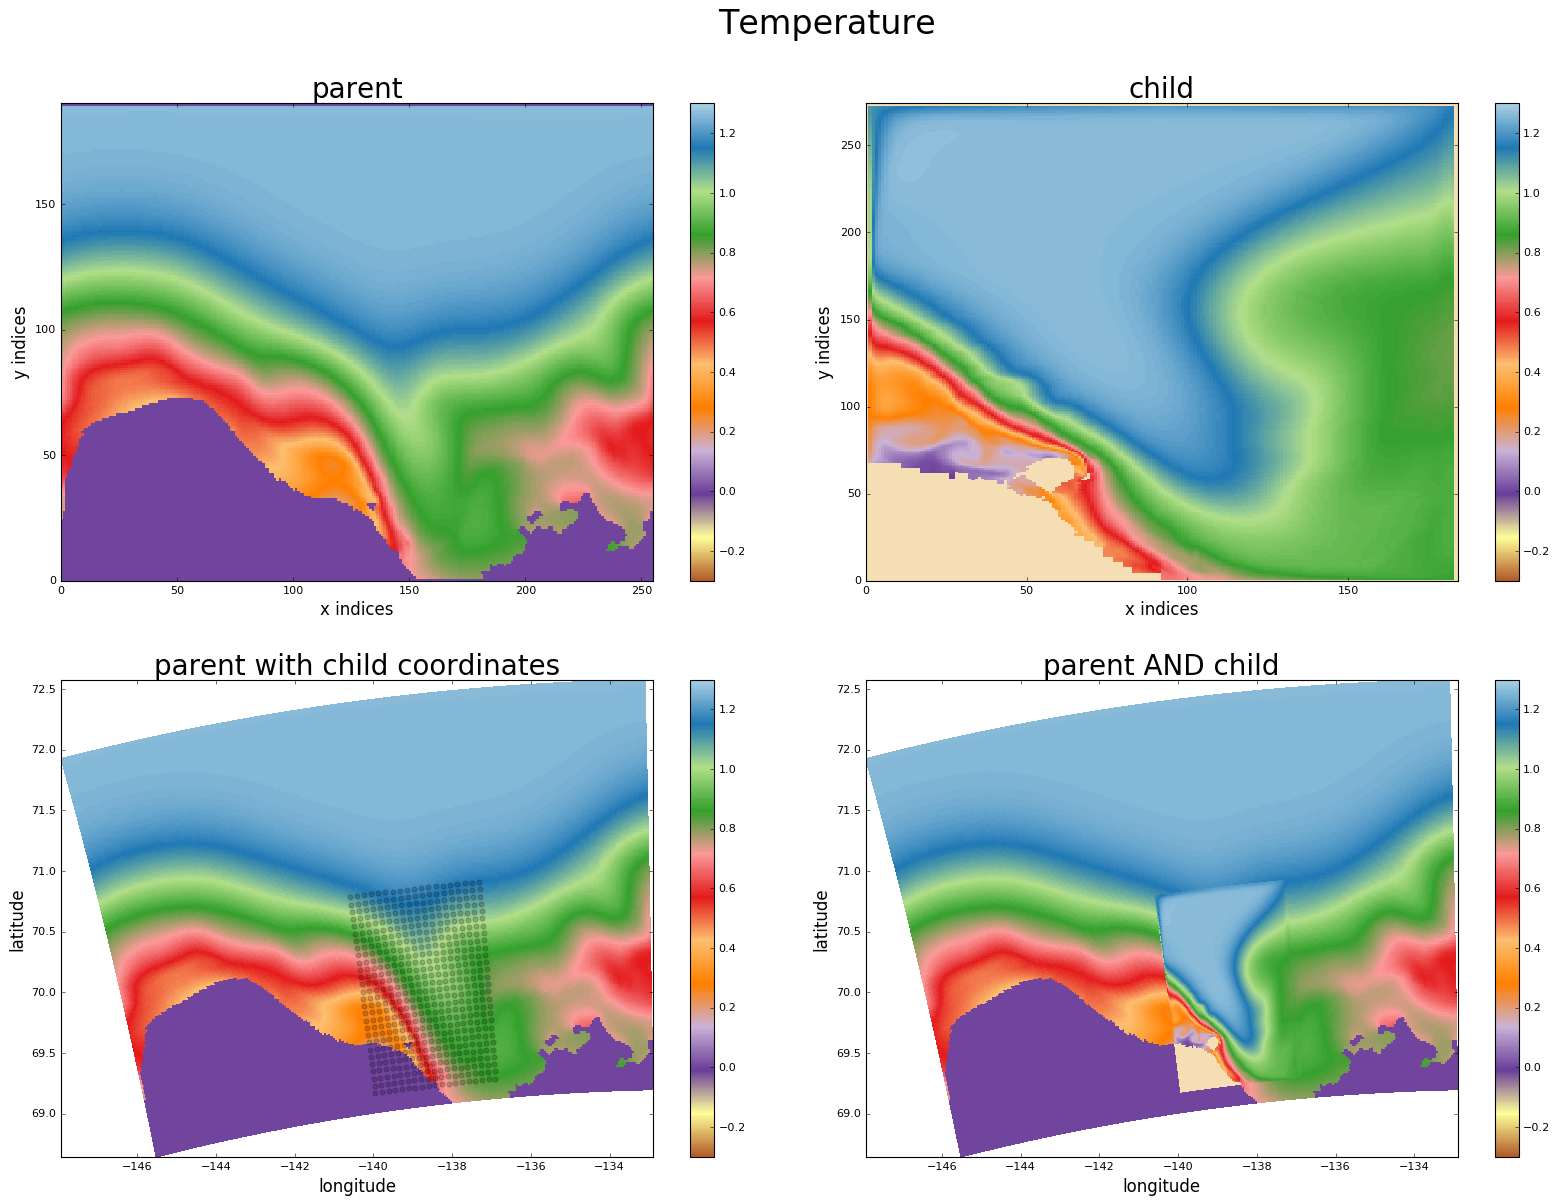

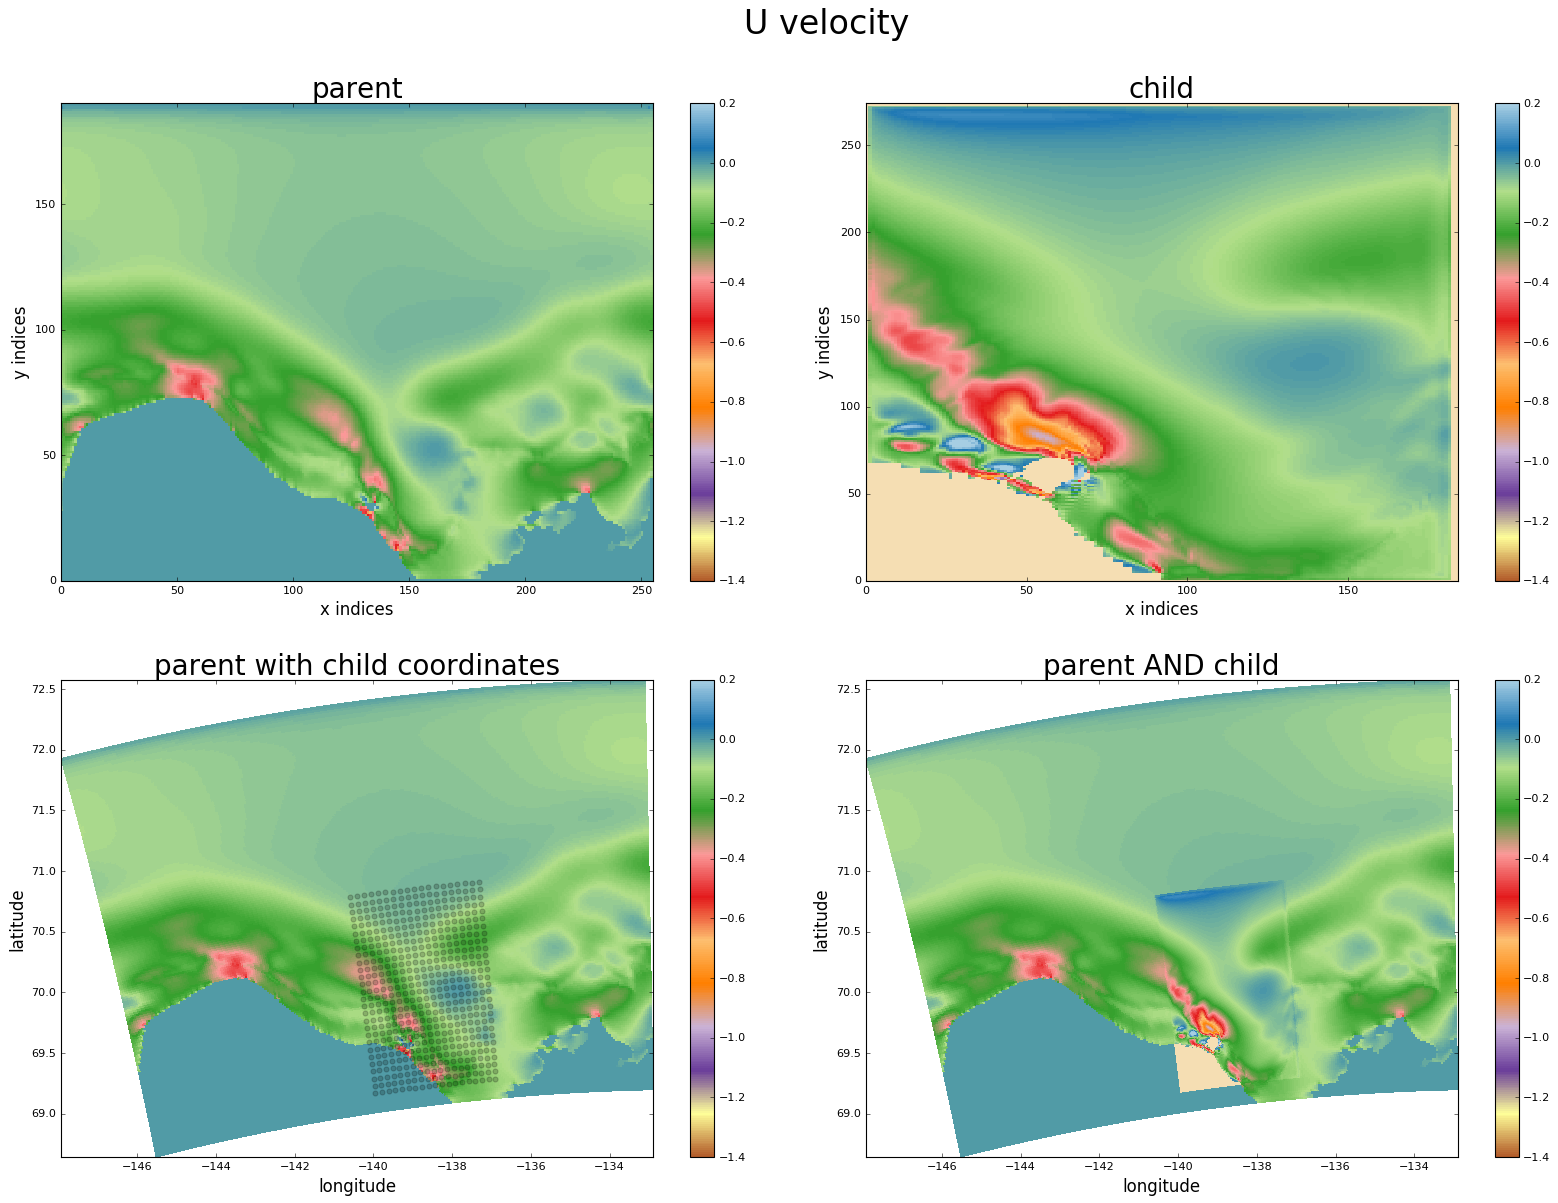

In [6]:
dirname='/home/mdunphy/Canyons/Results/Real4/'
filesT = get_daily_files(dirname, 'grid_T')
filesT.sort(key=os.path.basename)

filesU = get_daily_files(dirname, 'grid_U')
filesU.sort(key=os.path.basename)

dep_ind = 0
temp_parent, temp_child, u_parent, u_child, nav_lon_parent, nav_lat_parent, nav_lon_child, nav_lat_child = get_variables(dep_ind, filesT, filesU)

ttl = 'Temperature'
figT =  make_plot(temp_parent, temp_child, nav_lon_parent, nav_lat_parent, nav_lon_child, nav_lat_child, -0.3, 1.3, ttl)

ttl = 'U velocity'
figU =  make_plot(u_parent, u_child, nav_lon_parent, nav_lat_parent, nav_lon_child, nav_lat_child, -1.4, 0.2, ttl)

# Real using dynspg_flt

In [7]:
! ls /home/mdunphy/Canyons/Results/Real4flt/

1_layout.dat	       1_time.step			namelist_ref
1_mesh_mask.nc	       AGRIF_FixedGrids.in		nam_rebuild
1_namelist_cfg	       domain_def.xml			NEMO.sh
1_namelist_ref	       field_def.xml			ocean.output
1_ocean.output	       iodef.xml			output.namelist.dyn
1_output.abort.nc      layout.dat			solver.stat
1_output.init.nc       mackenzie03_real_agrif_flt.yaml	stderr
1_output.namelist.dyn  mackenzie_canyon_rev.txt		stdout
1_solver.stat	       namelist_cfg


# At shelf break depth (ind=9, gdept=83.125)

### 1. Ideal using dynspg_ts

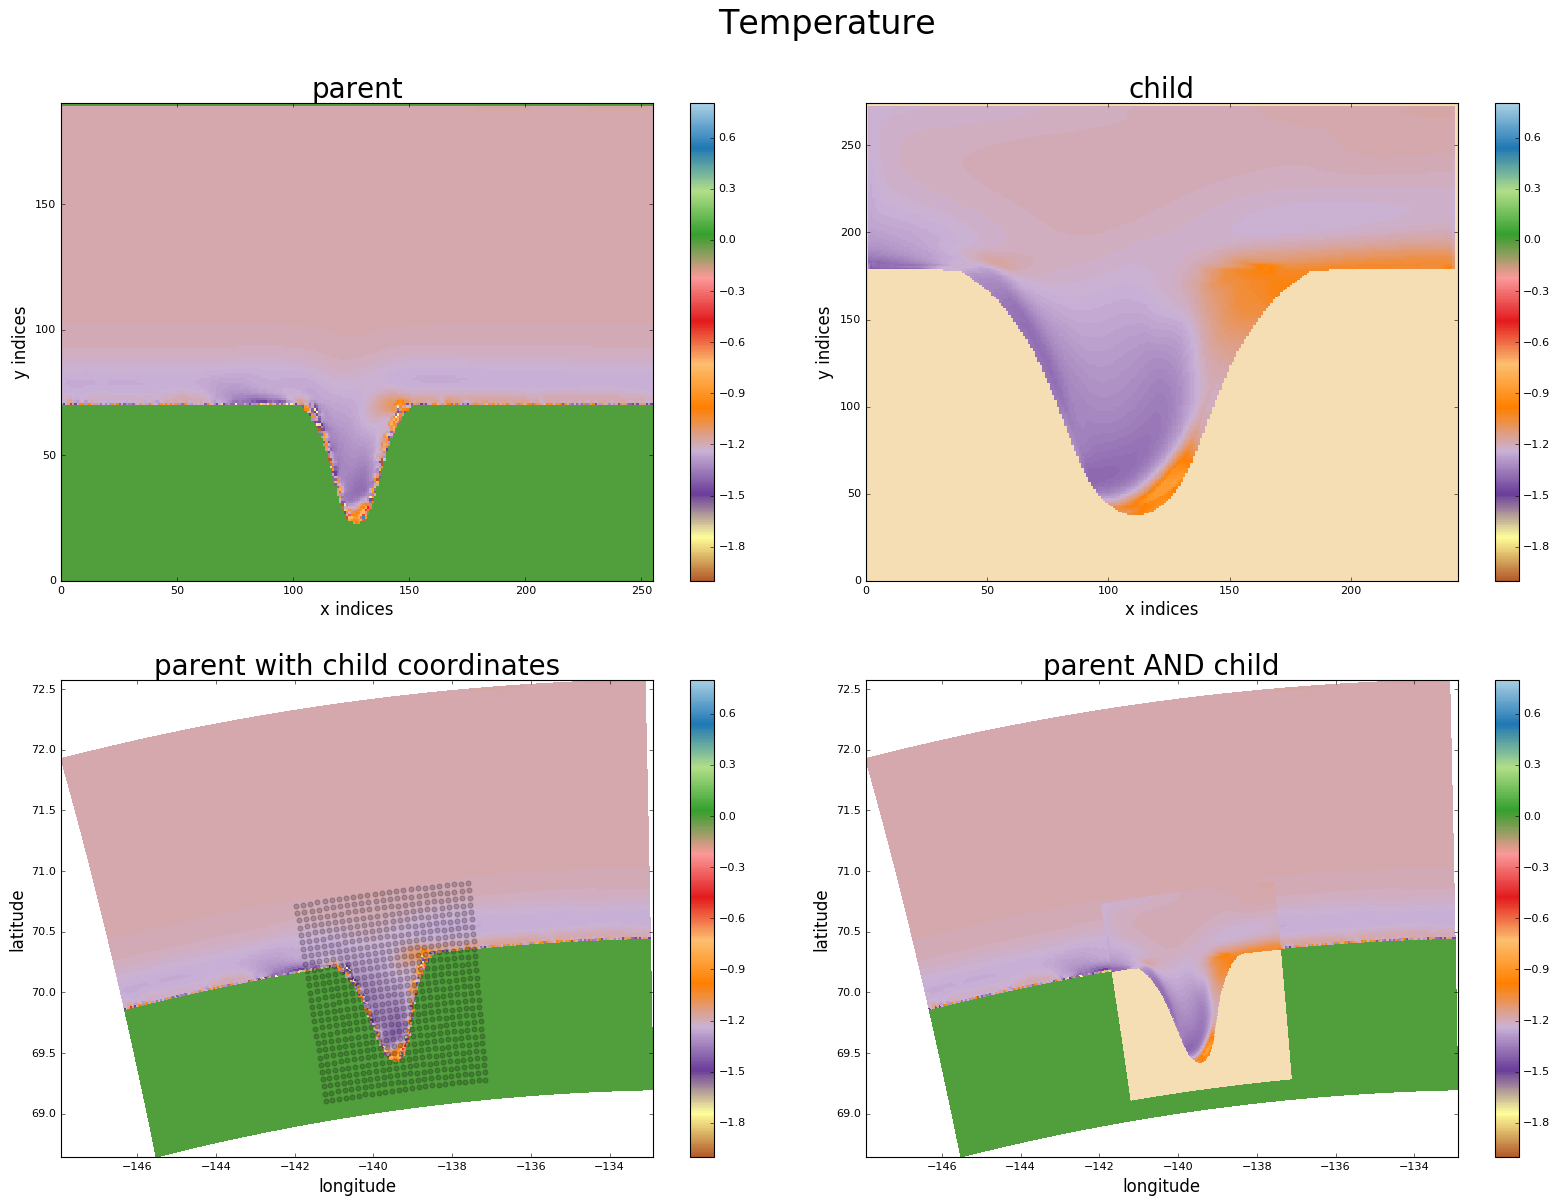

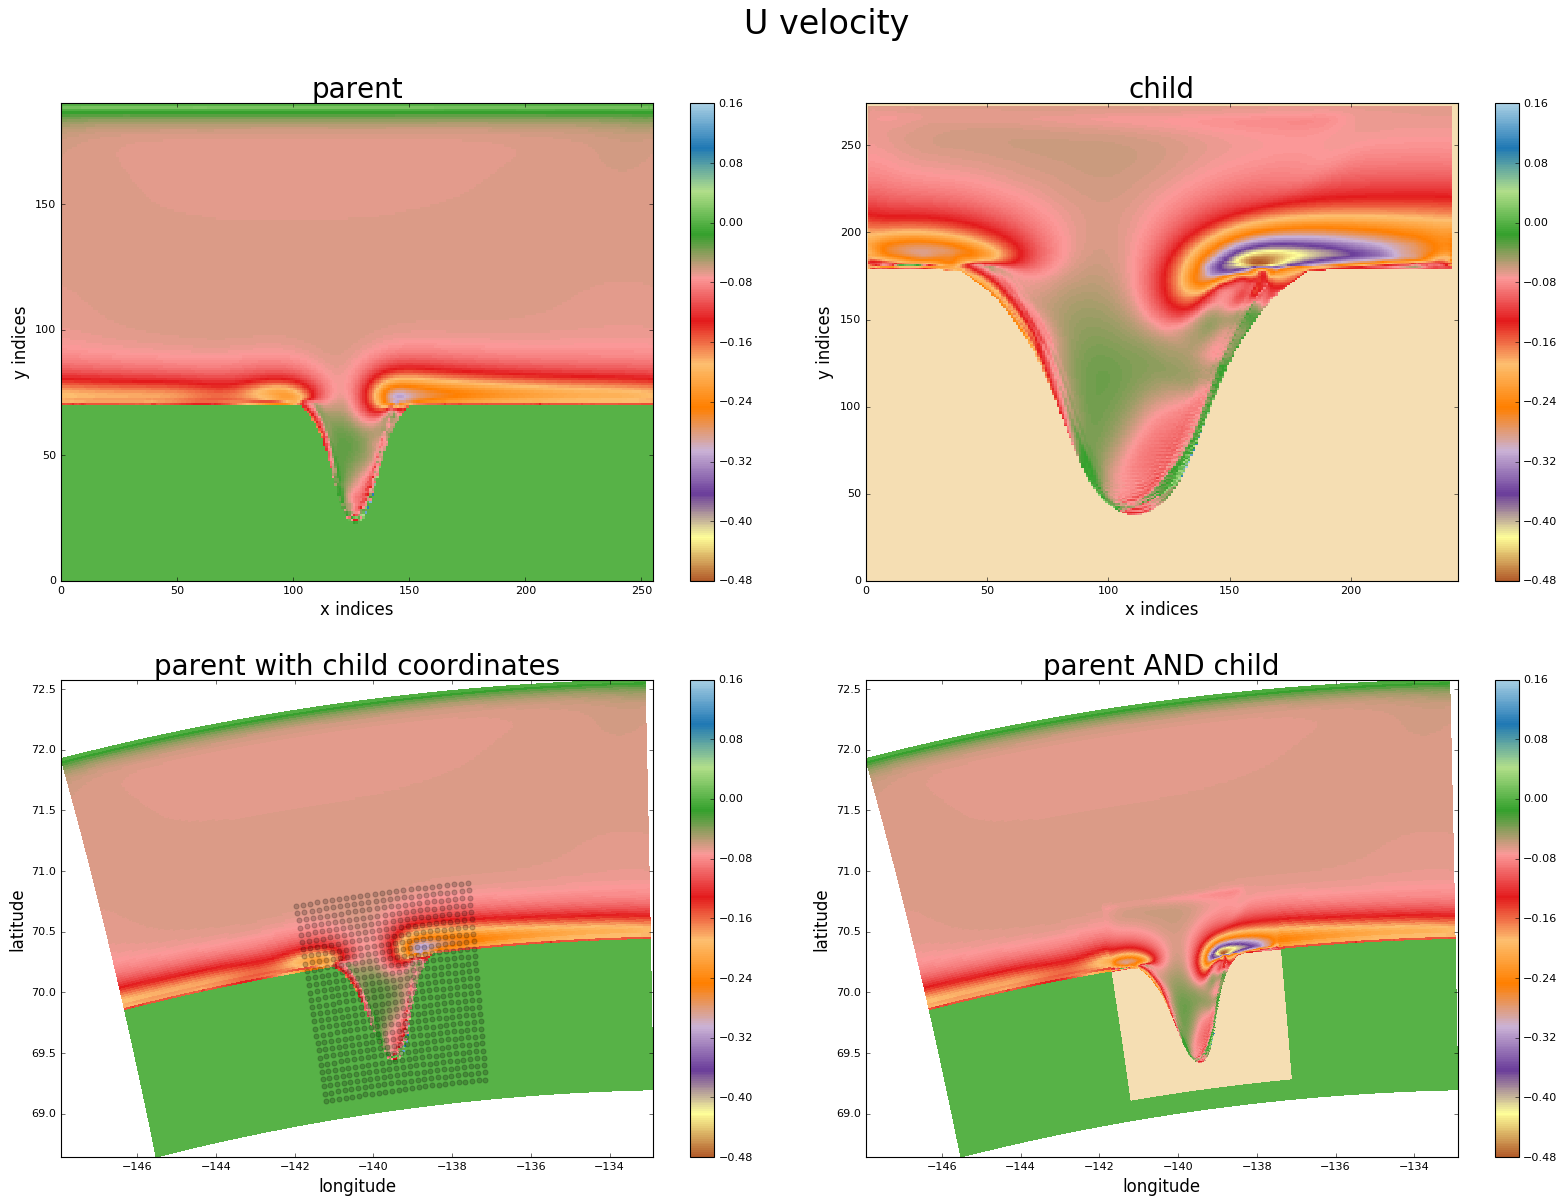

In [8]:
dirname='/home/mdunphy/Canyons/Results/Ideal4/'
filesT = get_daily_files(dirname, 'grid_T')
filesT.sort(key=os.path.basename)

filesU = get_daily_files(dirname, 'grid_U')
filesU.sort(key=os.path.basename)

dep_ind = 9
temp_parent, temp_child, u_parent, u_child, nav_lon_parent, nav_lat_parent, nav_lon_child, nav_lat_child = get_variables(dep_ind, filesT, filesU)

ttl = 'Temperature'
figT =  make_plot(temp_parent, temp_child, nav_lon_parent, nav_lat_parent, nav_lon_child, nav_lat_child, -2.0, 0.8, ttl)

ttl = 'U velocity'
figU =  make_plot(u_parent, u_child, nav_lon_parent, nav_lat_parent, nav_lon_child, nav_lat_child, -0.48, 0.16, ttl)

### 2. Ideal using dynspg_flt

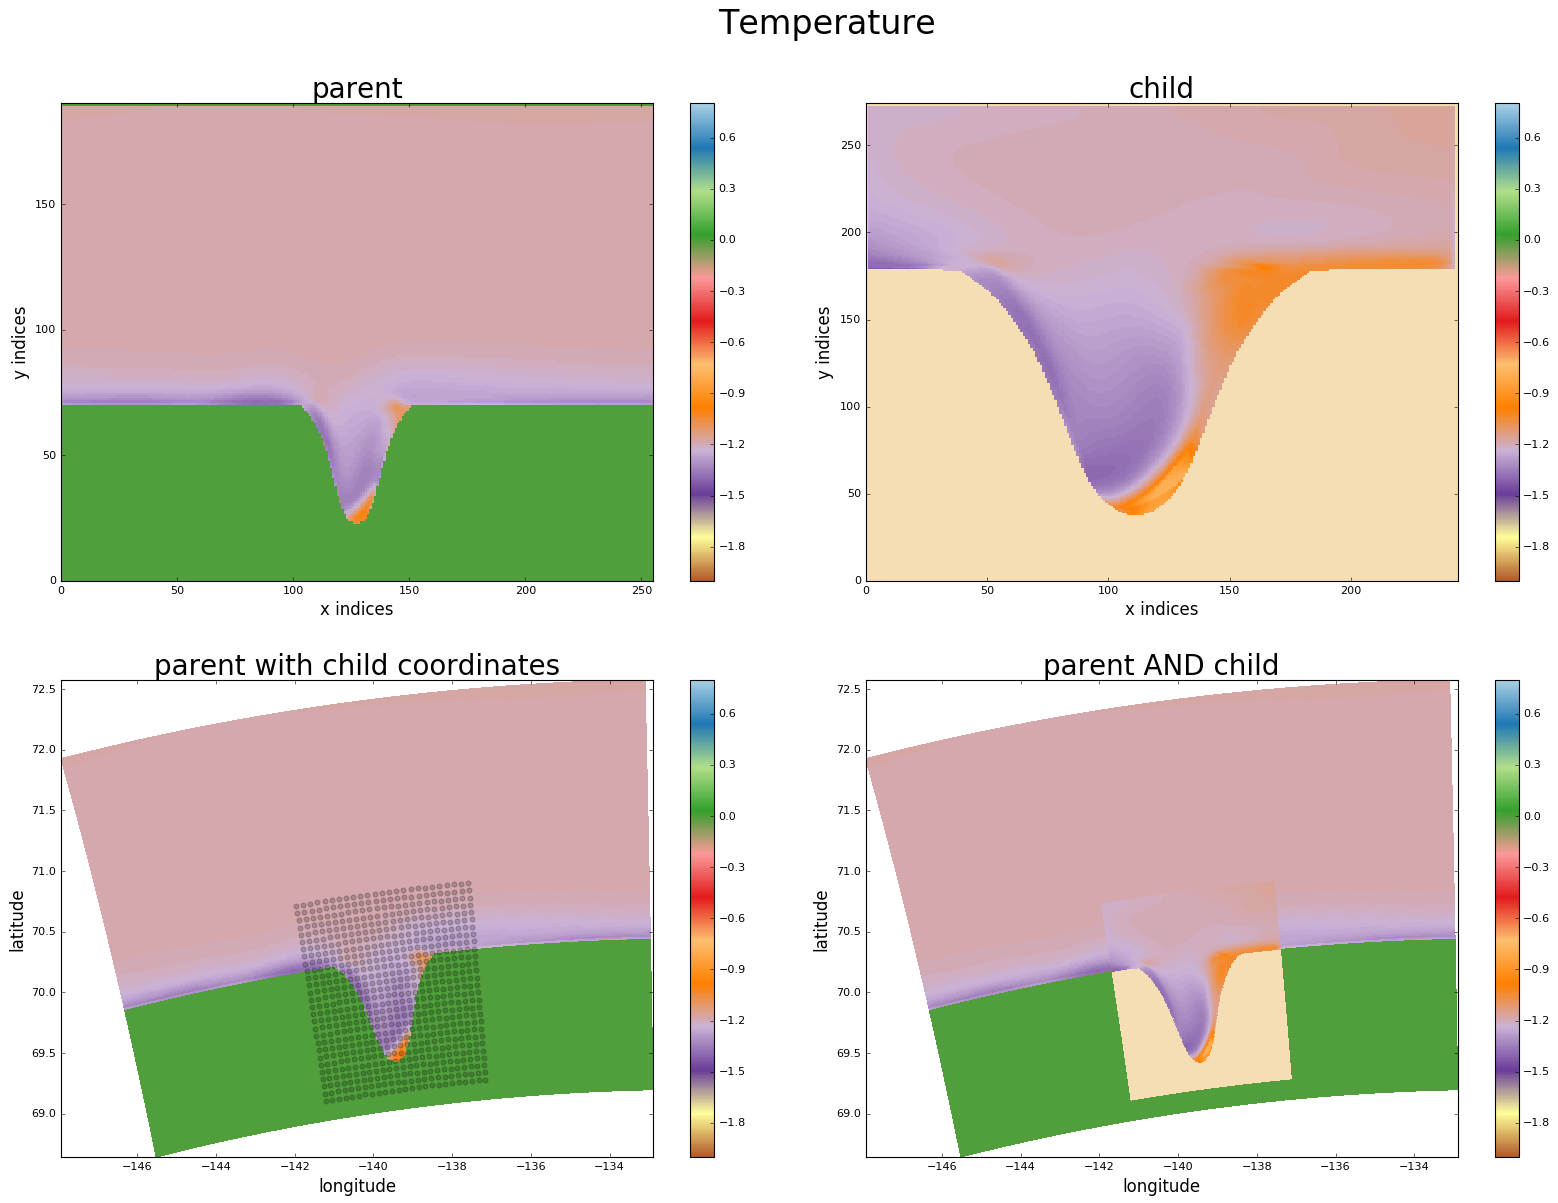

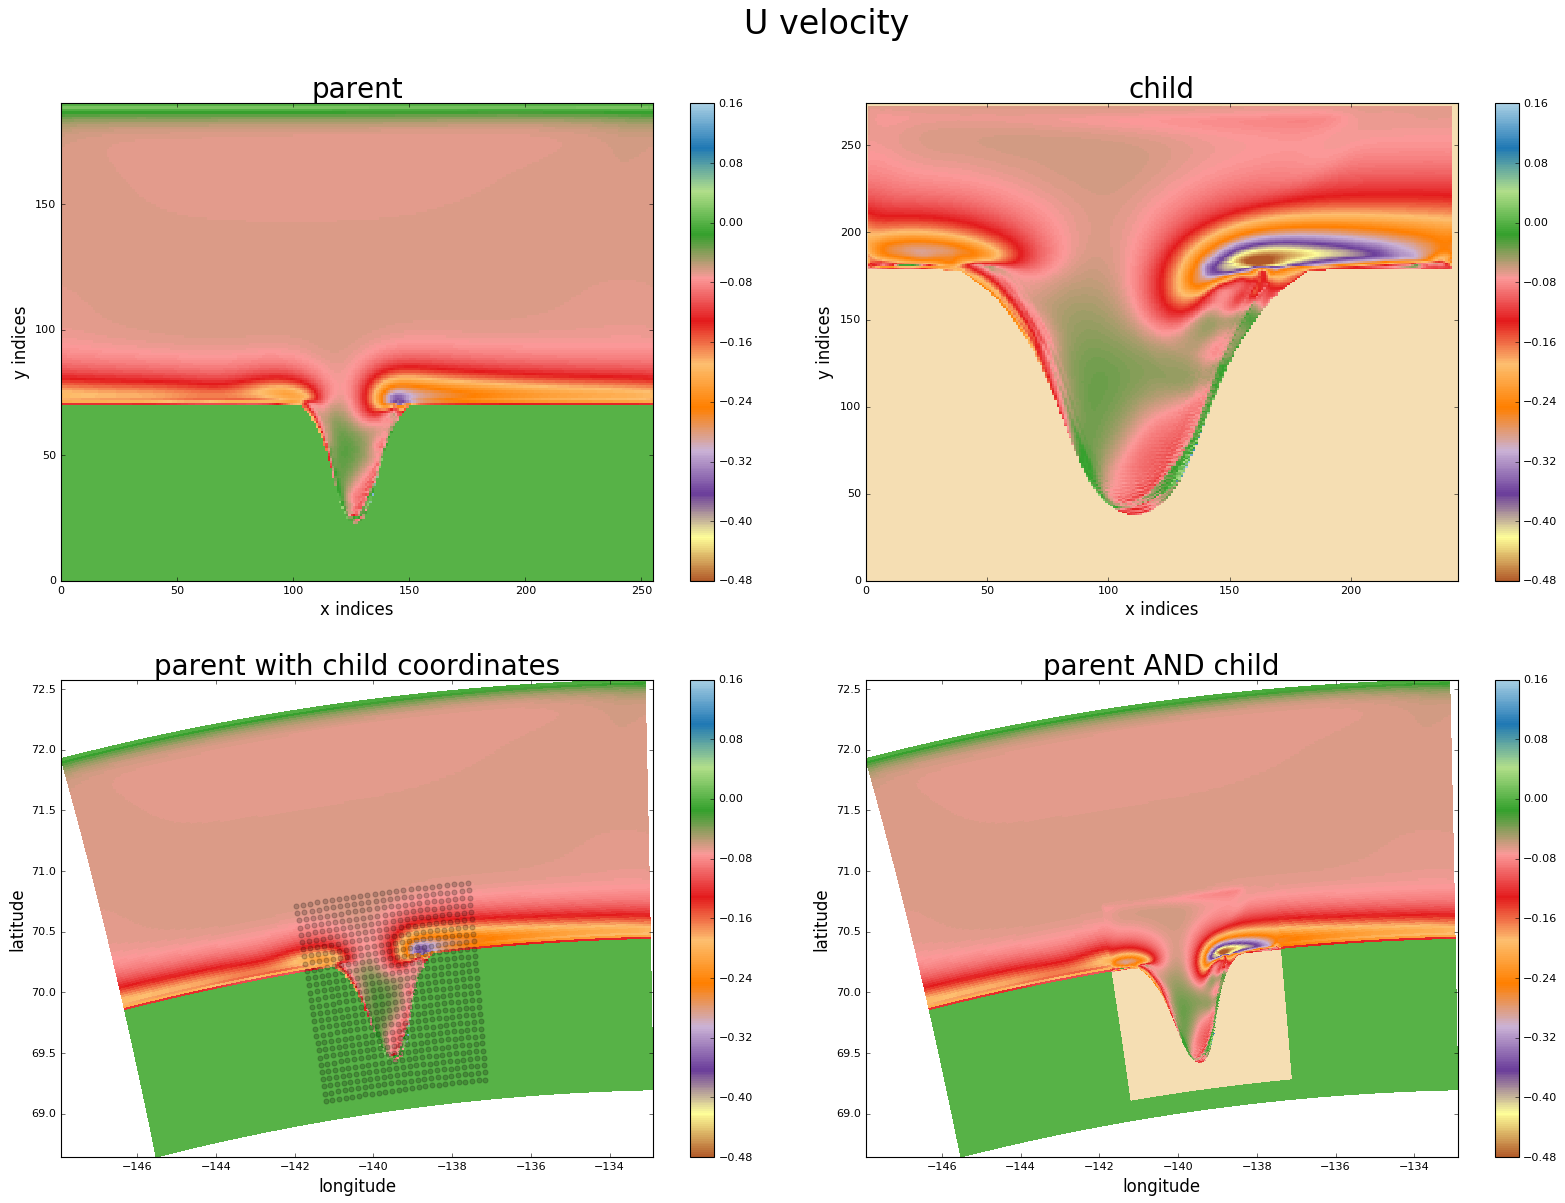

In [9]:
dirname='/home/mdunphy/Canyons/Results/Ideal4flt/'
filesT = get_daily_files(dirname, 'grid_T')
filesT.sort(key=os.path.basename)

filesU = get_daily_files(dirname, 'grid_U')
filesU.sort(key=os.path.basename)

dep_ind = 9
temp_parent, temp_child, u_parent, u_child, nav_lon_parent, nav_lat_parent, nav_lon_child, nav_lat_child = get_variables(dep_ind, filesT, filesU)

ttl = 'Temperature'
figT =  make_plot(temp_parent, temp_child, nav_lon_parent, nav_lat_parent, nav_lon_child, nav_lat_child, -2.0, 0.8, ttl)

ttl = 'U velocity'
figU =  make_plot(u_parent, u_child, nav_lon_parent, nav_lat_parent, nav_lon_child, nav_lat_child, -0.48, 0.16, ttl)

### 3. Real using dynspg_ts

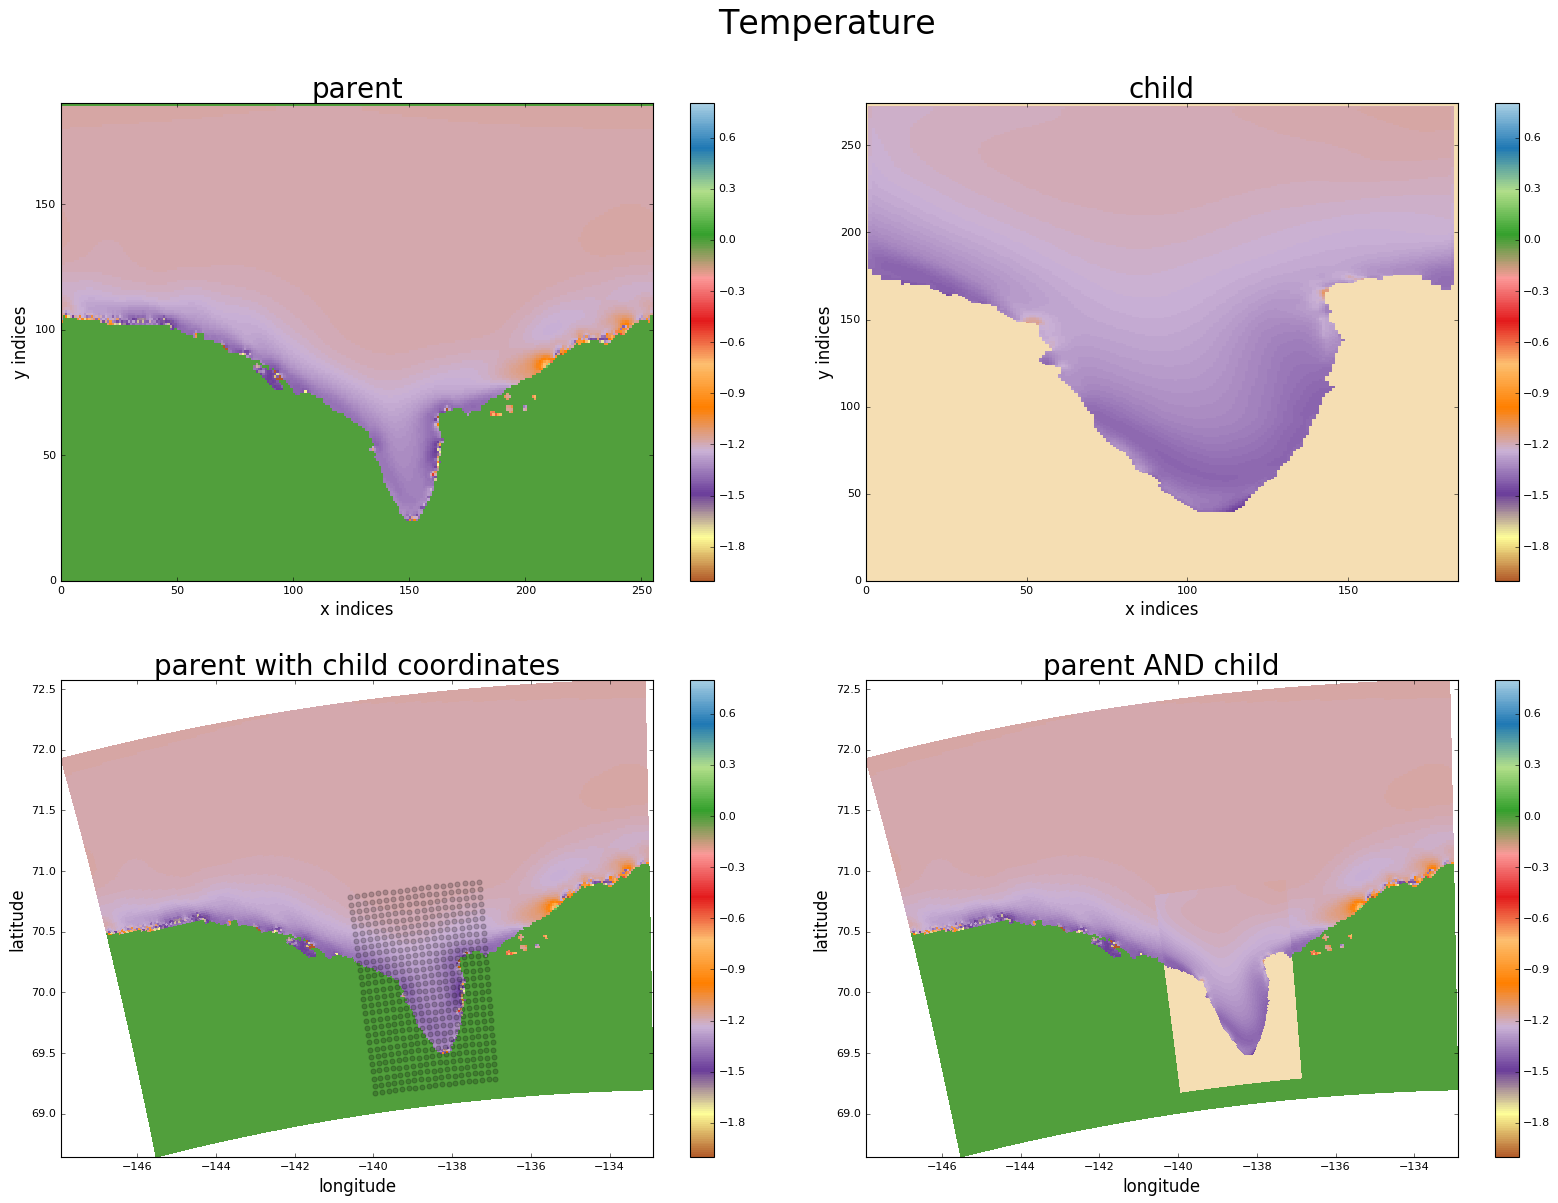

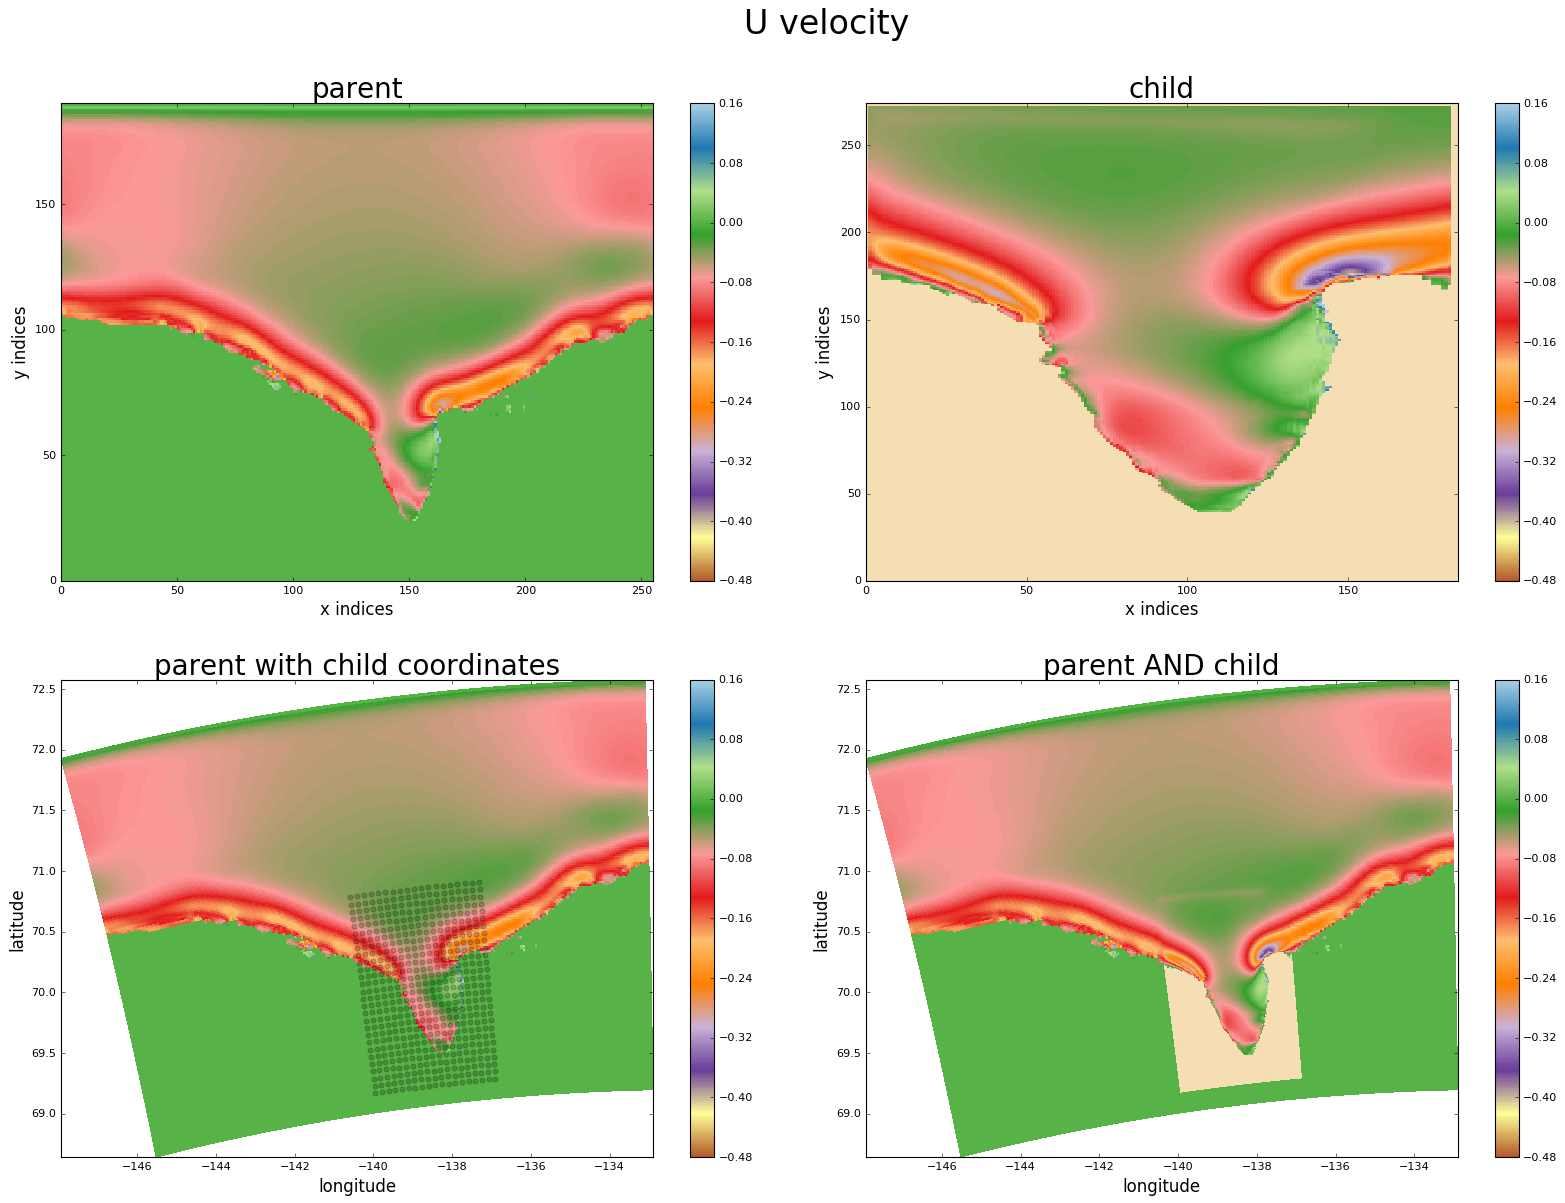

In [10]:
dirname='/home/mdunphy/Canyons/Results/Real4/'
filesT = get_daily_files(dirname, 'grid_T')
filesT.sort(key=os.path.basename)

filesU = get_daily_files(dirname, 'grid_U')
filesU.sort(key=os.path.basename)

dep_ind = 9
temp_parent, temp_child, u_parent, u_child, nav_lon_parent, nav_lat_parent, nav_lon_child, nav_lat_child = get_variables(dep_ind, filesT, filesU)

ttl = 'Temperature'
figT =  make_plot(temp_parent, temp_child, nav_lon_parent, nav_lat_parent, nav_lon_child, nav_lat_child, -2.0, 0.8, ttl)

ttl = 'U velocity'
figU =  make_plot(u_parent, u_child, nav_lon_parent, nav_lat_parent, nav_lon_child, nav_lat_child, -0.48, 0.16, ttl)